In [1]:
# Imports
import matplotlib.pyplot as plt
from perlin_noise import PerlinNoise
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [2]:
# Perling generation function
def generate_perlin_noise(xpix, ypix, octaves=3, seed=0):
    np.random.seed(seed)
    noise = PerlinNoise(octaves=octaves, seed=seed)
    return np.array([[noise([i/xpix, j/ypix]) for j in range(xpix)] for i in range(ypix)])

In [4]:
# Constants
xpix = 30
ypix = 30
octaves = 2.5
seed = 0

In [5]:
# Creating 2D array of Y levels
perlin_map = generate_perlin_noise(xpix, ypix, octaves, seed)
my_map = []
for index,value in enumerate(perlin_map):
    my_map.append([])
    for i in value:
        new_height = i
        new_height = 100 + i * 100
        my_map[index].append(new_height)
my_map = np.array(my_map)
print(my_map)

[[100.         100.41884883 101.01148265 101.76362382 102.54519138
  103.18980907 103.55374787 103.55430269 103.18760354 102.52586091
  101.69404557 100.82600263 100.          99.58688543 100.92452931
  104.34736448 109.19939416 114.34611153 118.57890243 120.91193126
  120.77151017 118.07795135 113.21990258 106.92116599 100.
   93.26140413  87.93797429  84.96123946  84.70575085  87.00324265]
 [ 94.86752509  95.29352246  95.92282248  96.75757441  97.67140023
   98.4910132   99.05770623  99.26870996  99.09842078  98.5994986
   97.88383438  97.08338758  96.29089329  95.91847496  97.36715821
  101.00459395 106.17549718 111.72217902 116.39736431 119.16929472
  119.41911742 117.03055919 112.37188617 106.17014907  99.27771394
   92.55339816  87.24005901  84.26685608  84.00776314  86.29545222]
 [ 91.67248441  92.10185431  92.7151194   93.5174912   94.39912712
   95.20698274  95.7991365   96.08158669  96.02752088  95.67905767
   95.1314608   94.49982564  93.86823808  93.64824651  95.21796805
  

In [6]:
# Creating colors for 2D map
noise_colors = [(0.0, 'blue'), (0.5, 'blue'), (0.51, 'green'), (1.0, 'green')]
custom_cmap = LinearSegmentedColormap.from_list('minecraft', noise_colors)

Text(0.5, 1.0, '2D Procedural Generation')

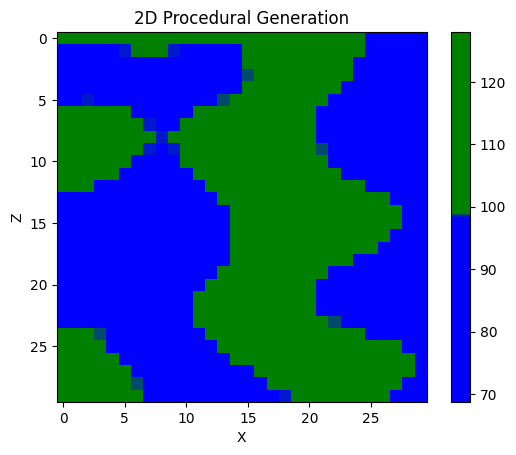

In [7]:
# Displaying 2D plot
plt.imshow(my_map, cmap=custom_cmap)
plt.colorbar()
plt.xlabel('X')
plt.ylabel('Z')
plt.title('2D Procedural Generation')

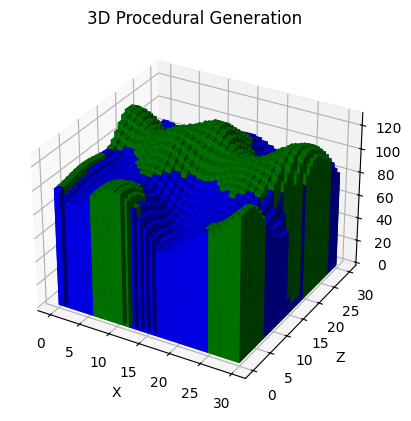

In [8]:
# Draw 3D graph
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

x = np.arange(len(my_map))
z = np.arange(len(my_map[0]))
x, z = np.meshgrid(x, z)
x = x.flatten()
z = z.flatten()

y = my_map.flatten()
max_y = max(y)
size = [xpix, max_y, ypix]

for i in range(len(my_map)):
    for j in range(len(my_map[0])):
        x = i
        z = j
        y = my_map[i][j]
        if y <= 100:
            color = 'blue'
        else:
            color = 'green'
        ax.bar3d(x, z, 0, 1, 1, y, color=color)

ax.set_xlabel('X')
ax.set_ylabel('Z')
ax.set_zlabel('Y')
ax.set_title('3D Procedural Generation')

plt.show()